In [1]:
import os
import rosbag
from data_loader.ros_msg.pointcloud import PointCloud
from data_loader.ros_msg.image import Image
from data_loader.ros_msg.odometry import Odometry
from data_loader.calib.intrinsic_extrinsic_loader import IntrinsicExtrinsicLoader

platform = 'ugv'
sequence_name = 'ugv_campus00'

In [2]:
##### Set up the rosbag path
dataset_path = '/Rocket_ssd/dataset/FusionPortable_dataset_develop/sensor_data/data_refined'
rosbag_path = os.path.join(dataset_path, sequence_name, sequence_name + '_refined.bag')
calib_path = os.path.join(dataset_path, '../../calibration_files/20230426_calib/calib')

##### Set up the message topic list for different platforms
if platform =='vehicle':
  from cfg.dataset.cfg_vehicle import dataset_sensor_frameid_dict
  sensor_frameid_dict = dataset_sensor_frameid_dict
  from cfg.dataset.cfg_vehicle import dataset_rostopic_msg_frameid_dict
  rostopic_msg_frameid_dict = dataset_rostopic_msg_frameid_dict
elif platform == 'ugv':
  from cfg.dataset.cfg_ugv import dataset_sensor_frameid_dict
  sensor_frameid_dict = dataset_sensor_frameid_dict
  from cfg.dataset.cfg_ugv import dataset_rostopic_msg_frameid_dict
  rostopic_msg_frameid_dict = dataset_rostopic_msg_frameid_dict

for key, value in sensor_frameid_dict.items():
  print('Sensor: {:<30}, Frame_id: {:<15}'.format(key, value[0]))

##### Set up the sensor configuration
int_ext_loader = IntrinsicExtrinsicLoader(is_print=False)
int_ext_loader.load_calibration(calib_path=calib_path, sensor_frameid_dict=sensor_frameid_dict)
print('Finish loading parameters')

NameError: name 'sensor_frameid_dict' is not defined

In [3]:
##### Open the rosbag
input_bag = rosbag.Bag(rosbag_path)
print('Finish reading bag, start loading messages, and writing messages to data folder')
print('Will save messages to {}'.format(os.path.join(dataset_path, sequence_name, 'raw_data')))

##### Initialize the lidar object of Sensor class
# Ouster
if 'ouster_points' in rostopic_msg_frameid_dict.keys():
  print('Loading Ouster messages...')
  pointcloud = PointCloud(sensor_type='ouster')
  output_data_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'ouster00', 'points')
  num_msg = pointcloud.load_messages_write_to_file(bag=input_bag, output_path=output_data_path, topic=rostopic_msg_frameid_dict['ouster_points'][0])
  print('     Saving {} Ouster points messages !'.format(num_msg))
  output_data_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'ouster00', 'nearir_image')
  ouster_nearir_image = Image(sensor_type='ouster', msg_type=rostopic_msg_frameid_dict['ouster_nearir_image'][1])
  num_msg = ouster_nearir_image.load_messages_write_to_file(bag=input_bag, output_path=output_data_path, topic=rostopic_msg_frameid_dict['ouster_nearir_image'][0])
  print('     Saving {} Ouster nearir_image messages !'.format(num_msg))
  output_data_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'ouster00', 'range_image')
  ouster_range_image = Image(sensor_type='ouster', msg_type=rostopic_msg_frameid_dict['ouster_range_image'][1])
  num_msg = ouster_range_image.load_messages_write_to_file(bag=input_bag, output_path=output_data_path, topic=rostopic_msg_frameid_dict['ouster_range_image'][0])
  print('     Saving {} Ouster range_image messages !'.format(num_msg))
  output_data_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'ouster00', 'reflec_image')
  ouster_reflec_image = Image(sensor_type='ouster', msg_type=rostopic_msg_frameid_dict['ouster_reflec_image'][1])
  num_msg = ouster_reflec_image.load_messages_write_to_file(bag=input_bag, output_path=output_data_path, topic=rostopic_msg_frameid_dict['ouster_reflec_image'][0])
  print('     Saving {} Ouster reflec_image messages !'.format(num_msg))
  output_data_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'ouster00', 'singal_image')
  ouster_signal_image = Image(sensor_type='ouster', msg_type=rostopic_msg_frameid_dict['ouster_signal_image'][1])
  num_msg = ouster_signal_image.load_messages_write_to_file(bag=input_bag, output_path=output_data_path, topic=rostopic_msg_frameid_dict['ouster_signal_image'][0])
  print('     Saving {} Ouster signal_image messages !'.format(num_msg))
  print('Finishing loading Ouster messages !')

# Frame_left
if 'frame_left_image' in rostopic_msg_frameid_dict.keys():
  print('Loading Frame_left messages...')
  frame_left_image = Image(sensor_type='frame_cam', msg_type=rostopic_msg_frameid_dict['frame_left_image'][1])
  output_data_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'frame_cam00', 'image')
  num_msg = frame_left_image.load_messages_write_to_file(bag=input_bag, output_path=output_data_path, topic=rostopic_msg_frameid_dict['frame_left_image'][0])
  print('     Saving {} Frame_left image messages !'.format(num_msg))
  print('Finishing loading Frame_left messages!')

# Frame_right
if 'frame_right_image' in rostopic_msg_frameid_dict.keys():
  print('Loading Frame_right messages...')
  frame_right_image = Image(sensor_type='frame_cam', msg_type=rostopic_msg_frameid_dict['frame_right_image'][1])
  output_data_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'frame_cam01', 'image')
  num_msg = frame_right_image.load_messages_write_to_file(bag=input_bag, output_path=output_data_path, topic=rostopic_msg_frameid_dict['frame_right_image'][0])
  print('     Saving {} Frame_right image messages !'.format(num_msg))
  print('Finishing loading Frame_right messages!')

# Vehicle Frame_left
if 'vehicle_frame_left_image' in rostopic_msg_frameid_dict.keys():
  print('Loading Vehicle Frame_left messages...')
  vehicle_frame_left_image = Image(sensor_type='frame_cam', msg_type=rostopic_msg_frameid_dict['vehicle_frame_left_image'][1])
  output_data_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'vehicle_frame_cam00', 'image')
  num_msg = vehicle_frame_left_image.load_messages_write_to_file(bag=input_bag, output_path=output_data_path, topic=rostopic_msg_frameid_dict['vehicle_frame_left_image'][0])
  print('     Saving {} Vehicle Frame_left image messages !'.format(num_msg))
  print('Finishing loading Vehicle Frame_left messages!')

# Vehicle Frame_right
if 'vehicle_frame_right_image' in rostopic_msg_frameid_dict.keys():
  print('Loading Vehicle Frame_right messages...')
  frame_right_image = Image(sensor_type='frame_cam', msg_type=rostopic_msg_frameid_dict['vehicle_frame_right_image'][1])
  output_data_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'vehicle_frame_cam01', 'image')
  num_msg = frame_right_image.load_messages_write_to_file(bag=input_bag, output_path=output_data_path, topic=rostopic_msg_frameid_dict['vehicle_frame_right_image'][0])
  print('     Saving {} Vehicle Frame_right image messages !'.format(num_msg))
  print('Finishing loading Vehicle Frame_right messages!')

# Event_right
if 'event_left_image' in rostopic_msg_frameid_dict.keys():
  print('Loading Event_left messages...')
  event_left_image = Image(sensor_type='event_left', msg_type=rostopic_msg_frameid_dict['event_left_image'][1])
  output_data_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'event_cam00', 'image')
  num_msg = event_left_image.load_messages_write_to_file(bag=input_bag, output_path=output_data_path, topic=rostopic_msg_frameid_dict['event_left_image'][0])
  print('     Saving {} Event_left image messages !'.format(num_msg))
  print('Finishing loading Event_left messages!')

# Event_right
if 'event_right_image' in rostopic_msg_frameid_dict.keys():
  print('Loading Event_right messages...')
  event_right_image = Image(sensor_type='event_right', msg_type=rostopic_msg_frameid_dict['event_right_image'][1])
  output_data_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'event_cam01', 'image')
  num_msg = event_right_image.load_messages_write_to_file(bag=input_bag, output_path=output_data_path, topic=rostopic_msg_frameid_dict['event_right_image'][0])
  print('     Saving {} Event_right image messages !'.format(num_msg))
  print('Finishing loading Event_right messages!')

##### Close the rosbag
input_bag.close()
print('Close the rosbag')

Finish reading bag, start loading messages, and writing messages to data folder
Will save messages to /Rocket_ssd/dataset/FusionPortable_dataset_develop/sensor_data/data_refined/vehicle_highway00/raw_data
Loading Ouster messages...
     Saving 6950 Ouster points messages !
     Saving 6950 Ouster nearir_image messages !
     Saving 6950 Ouster range_image messages !
     Saving 6950 Ouster reflec_image messages !
     Saving 6950 Ouster signal_image messages !
Finishing loading Ouster messages !
Loading Vehicle Frame_left messages...
     Saving 13900 Vehicle Frame_left image messages !
Finishing loading Vehicle Frame_left messages!
Loading Vehicle Frame_right messages...
     Saving 13900 Vehicle Frame_right image messages !
Finishing loading Vehicle Frame_right messages!
Loading Event_left messages...
     Saving 13900 Event_left image messages !
Finishing loading Event_left messages!
Loading Event_right messages...
     Saving 13900 Event_right image messages !
Finishing loading Eve

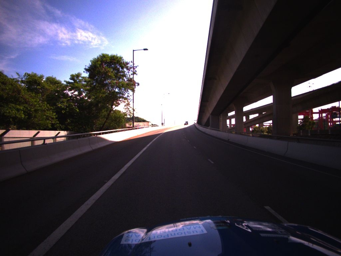

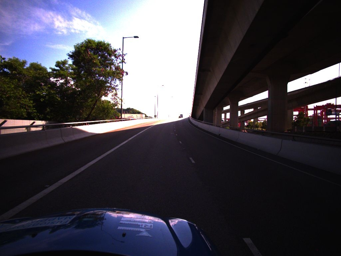

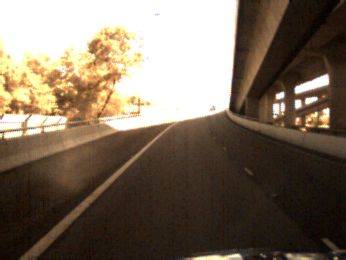

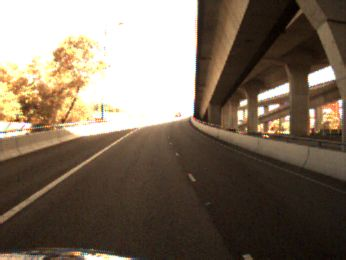

In [10]:
# TEST: visualize data
from PIL import Image
from IPython.display import display

frame_id = 0

img_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'vehicle_frame_cam00', 'image/data', '{:06d}.png'.format(frame_id))
img = Image.open(img_path)
img_fl = img.resize((img.size[0] // 3, img.size[1] // 3))

img_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'vehicle_frame_cam01', 'image/data', '{:06d}.png'.format(frame_id))
img = Image.open(img_path)
img_fr = img.resize((img.size[0] // 3, img.size[1] // 3))

img_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'event_cam00', 'image/data', '{:06d}.png'.format(frame_id))
img = Image.open(img_path)
img_el = img.resize((img.size[0], img.size[1]))

img_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'event_cam01', 'image/data', '{:06d}.png'.format(frame_id))
img = Image.open(img_path)
img_er = img.resize((img.size[0], img.size[1]))

display(img_fl, img_fr, img_el, img_er)